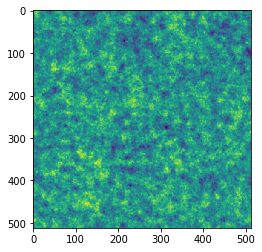

In [1]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,least_squares
from numpy import log,exp

%matplotlib inline
try:
    data=np.loadtxt("C://Users//Asus//Desktop//1.txt")
except:
    data=np.loadtxt("../1")
data -= data.mean()
data /= data.std()

plt.imshow(data)
plt.show()
plt.savefig("pro1")

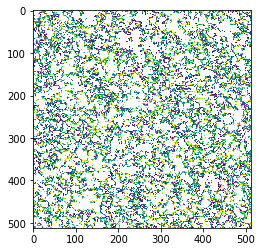

In [2]:
nu = 0
du = 1

contour = data+0
contour[(nu-du/2.>contour) | (contour>nu+du/2.)] = np.nan


plt.imshow(contour)

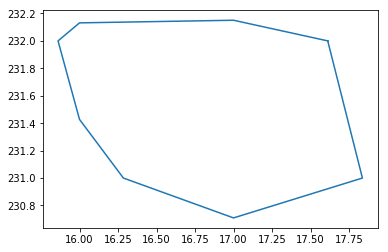

16.8006217983 231.60209114


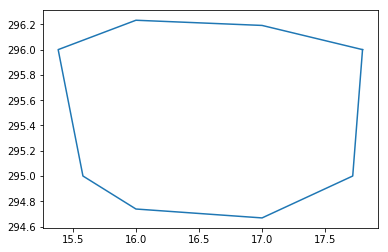

16.6972132188 295.536784061


In [3]:
con = measure.find_contours(data,1)

nc = 10

for nc in range(50,52):
    plt.plot(con[nc][:,0],con[nc][:,1])
    plt.show()
    print (con[nc][:,0].mean(),con[nc][:,1].mean())

In [4]:
#calculate Radius(R),Area(A),Perimeter(s)
def carachters(d,nu):
    contour = measure.find_contours(d,nu)   
    num_c = len(contour)

    perimeter = []
    area = []
    radius = []

    for nc in range(num_c):
        n_points = contour[nc].shape[0]
        x = contour[nc][:,0]
        y = contour[nc][:,1]
        s_nc = 0
        for i in range(n_points):

             s_nc += np.sqrt((x[i-1]-x[i])**2+(y[i-1]-y[i])**2)        

        x_c = x.mean()
        y_c = y.mean()

        r = np.sqrt(np.mean((x-x_c)**2+(y-y_c)**2))

        A=np.abs(0.5*np.sum(y[:-1]*np.diff(x) - x[:-1]*np.diff(y)))

        perimeter.append(s_nc)
        area.append(A)
        radius.append(r)
    
    return [contour,np.array(perimeter),np.array(area),np.array(radius)]

In [5]:
[contour,perimeter,area,radius] = carachters(data,0)

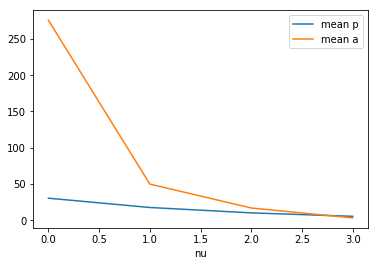

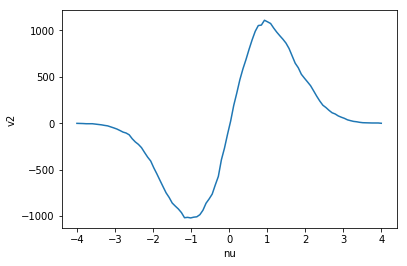

In [19]:
#Calculate V0=mean area, V1=mean perimeter 
meanp=[]
meana=[]

for i in range(4):
    [contour,perimeter,area,radius] = carachters(data,i)
    meanp.append(np.mean(perimeter))
    meana.append(np.mean(area))
plt.plot(meanp,label='mean p') 
plt.plot(meana,label='mean a')
plt.xlabel('nu')
plt.legend()
plt.show()


#Genus=V2
def hotspot(data,trsh):
    hotspots = measure.label(data>trsh)
    return hotspots.max()

def coldspot(data,trsh):
    coldspots = measure.label(data<trsh)
    return coldspots.max()

trshs = np.linspace(-4,4,100)
Genus = [hotspot(data,trsh)-coldspot(data,trsh) for trsh in trshs]
plt.xlabel('nu')
plt.ylabel('v2')
plt.plot(trshs,Genus)

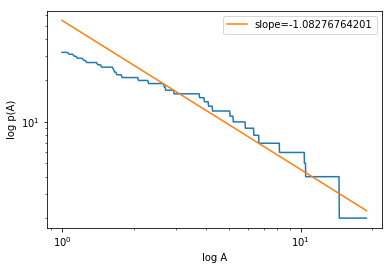

In [15]:
#calculate p(A):The cumulative distribution of the number of contours with area greater than A, and kesi:area cumulative exponent

def area_cum(area):
    amax, amin = area.max(),area.min()
    out = []
    a_list = np.linspace(amax/2,1,1000)
    for a in a_list:
        out.append(np.sum(area>a))
        
    return [a_list,np.array(out)]
  
a_list,p_cum = area_cum(area)

fit=np.polyfit(log(a_list),log(p_cum),1)
fet=np.poly1d(fit)
plt.loglog(a_list,p_cum)
plt.loglog(a_list,np.exp(fet(log(a_list))),label='slope='+str(fit[0]))
plt.xlabel('log A')
plt.ylabel('log p(A)')
plt.legend()

# slope=-kesi/2=-1.082767, kesi=2.1654

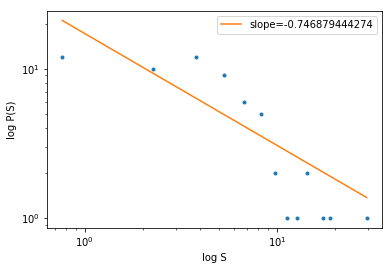

[0.76255513039988987, 2.2675456553205207, 3.7725361802411514, 5.2775267051617822, 6.782517230082413, 8.2875077550030447, 9.7924982799236737, 11.297488804844306, 12.802479329764935, 14.307469854685568, 15.812460379606199, 17.317450904526829, 18.822441429447458, 20.327431954368087, 21.832422479288724, 23.337413004209353, 24.842403529129982, 26.347394054050611, 27.852384578971247, 29.357375103891876]
[12 10 12  9  6  5  2  1  1  2  0  1  1  0  0  0  0  0  0  1]


In [16]:
# calculate p(s):The probability distribution of contour lengths, and eta: length distributhion  exponent
per_filt = perimeter[perimeter<200]
hist, bin_edges = np.histogram(per_filt,bins=20)
bin_cent = [0.5*(bin_edges[i]+bin_edges[i+1]) for i in range(20)]
fit78=np.polyfit(log(bin_cent[0:8]),log(hist[0:8]),1)
fet78=np.poly1d(fit78)
plt.loglog(bin_cent,hist,'.')
plt.loglog(bin_cent,exp(fet78(log(bin_cent))),label='slope='+str(fit78[0]))
plt.xlabel('log S')
plt.ylabel('log P(S)')
plt.legend()
plt.show()
print(bin_cent)
print(hist)

#slope=-eta=-0.746879

In [9]:
#calculate G(r):The loop correlathion function 

def corr(data):
    lmax = len(data)//2
    c = np.zeros(lmax)
    clist = np.zeros(lmax)
    for i in range(10*lmax**2):
        x1,y1,x2,y2 = np.random.randint(lmax,size=4)
        d = np.sqrt((y1-y1)**2+(x1 -x2)**2)
        c[int(d)]+=1
        clist[int(d)] += data[x1,y1]*data[x2,y2]
    return clist/c

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


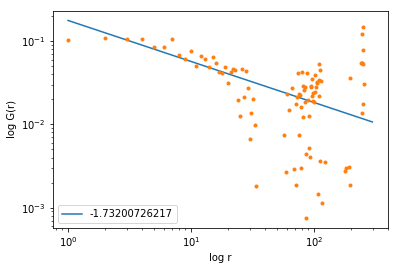

In [18]:
#calculate xl:is the loop correlation exponent

crlist = corr(data)
rha=1+np.arange(crlist.shape[0])

xp=np.arange(0,300)
fit2=np.polyfit(log(rha[0:25]),log(crlist[0:25]),1)
fet2=np.poly1d(fit2)
plt.loglog(xp,exp(fet2(log(xp))),label=str(fet2[0]))
plt.loglog(rha,crlist,'.')
plt.xlabel('log r')
plt.ylabel('log G(r)')
plt.legend()
plt.show()

#slope=-2xl=-1.72179, xl=0.86

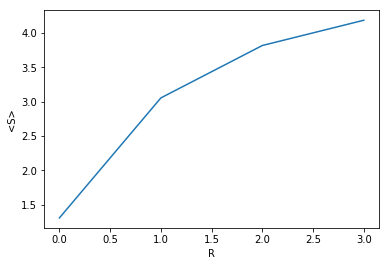

4 4


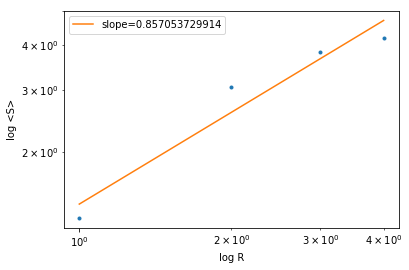

In [11]:
# plot <s>(R) and calculate Df: The fractal dimension of a contour loop
def meanS(perimeter,radius):
    f=[]
    k=[]
    for i in range(len(radius)):
        k.append(np.round(radius[i],0))
    
    h=[]
    m=[]
    for i in range(int(np.max(k))):
        r=i
        
        for j in range(len(k)):
            
            if r==k[j]:
                h.append(j)
        
        for c in (h):
            m.append(perimeter[int(c)])
          
        f.append(np.mean(m))
    
    return (f,int(np.max(k)))
            
z,k=meanS(perimeter,radius)
plt.plot(z)
plt.xlabel('R')
plt.ylabel('<S>')
plt.show()

R=1+np.arange(k)
plt.loglog(R,z,'.')
plt.xlabel('log R')
plt.ylabel('log <S>')
print(len(R),len(z))
plt.xscale('log')
plt.yscale('log')
fit=np.polyfit(log(R),log(z),1)
fet=np.poly1d(fit)

plt.loglog(R,np.exp(fet(log(R))),label='slope='+str(fit[0]))
plt.legend()
plt.show()

# slope=Df=0.8570